## Analyse Aufgabe 2

---

### Aufgabenstellung
Für Aufgabe 2 musste man mehrere eigene Quellen für politische Informationen nach ihrer subjektiven Glaubwürdigkeit und der eigenen Nutzungshäufigkeit ordnen.

*Hier ein schöneres Beispiel:*
![Deutsch.png](Deutsch.png)

Durch Betrachtung des Bildes als 2 Dimensionales Koordinatensystem, konnte jedem Wort ein Wert von `Nutzung` und `Vertrauem` zugeordnet werden.
Durch Verwendung eines kleinen Programms konnte man diese Zahlen dann für alle Aufgaben notieren:

In [6]:
import pickle

stats = {}

while True:
    break # Da schon alle Werte gespeichert sind ist das hier nicht mehr nötig
    word = input("Wort: ")
    if word == "exit":
        with open("stats.pkl", "wb") as f:
            pickle.dump(stats, f)
        break

    if not word in stats: stats[word] = {"nutzung"  : [], "vertrauen" : []}
    try:
        while True:
            nutzung = input("Nutzungswert: ")
            vertrauen = input("Vertrauenswert: ")
            if nutzung == "exit": break
            stats[word]["nutzung"].append(int(nutzung))
            stats[word]["vertrauen"].append(int(vertrauen))
    except:
        pass
    

### Aufarbeitung

Da die Daten nun vorhanden und gespeichert sind kann man sie jetzt geordnet darstellen. Je nach Diagramm Art ist hierfür allerdings eine Aufarbeitung der Daten notwendig.
Ein einfacher 2d Graph für jedes Wort ist weniger Sinnvoll, da so nur ein Verlauf dargestellt werden würde. Also soll der Durchschnitt aller Werte für jedes Wort gebildet werden:

In [10]:
import pickle

with open("stats.pkl", "rb") as f:
    stats = pickle.load(f)
nutzung = {}
vertrauen = {}

for item, x in stats.items():
    nutzung[item] = sum(x["nutzung"])/len(x["nutzung"])
    vertrauen[item] = sum(x["vertrauen"])/len(x["nutzung"])

### Darstellung

Die Wörter können nun durch Balkendiagramme relativ simpel repräsentiert werden.
Um den allgemeinen Wert der Quelle in der Klasse besser zu repräsentieren werden Vertrauen und Nutzung mit einander verrechnet um ein allgemeines Bild zu erhalten.
Außerdem kann noch eine "Idellösung" der Aufgabe 2 für unsere Klasse erstellt werden und zuletzt eine Wordcloud (weils schön aussieht).

[]

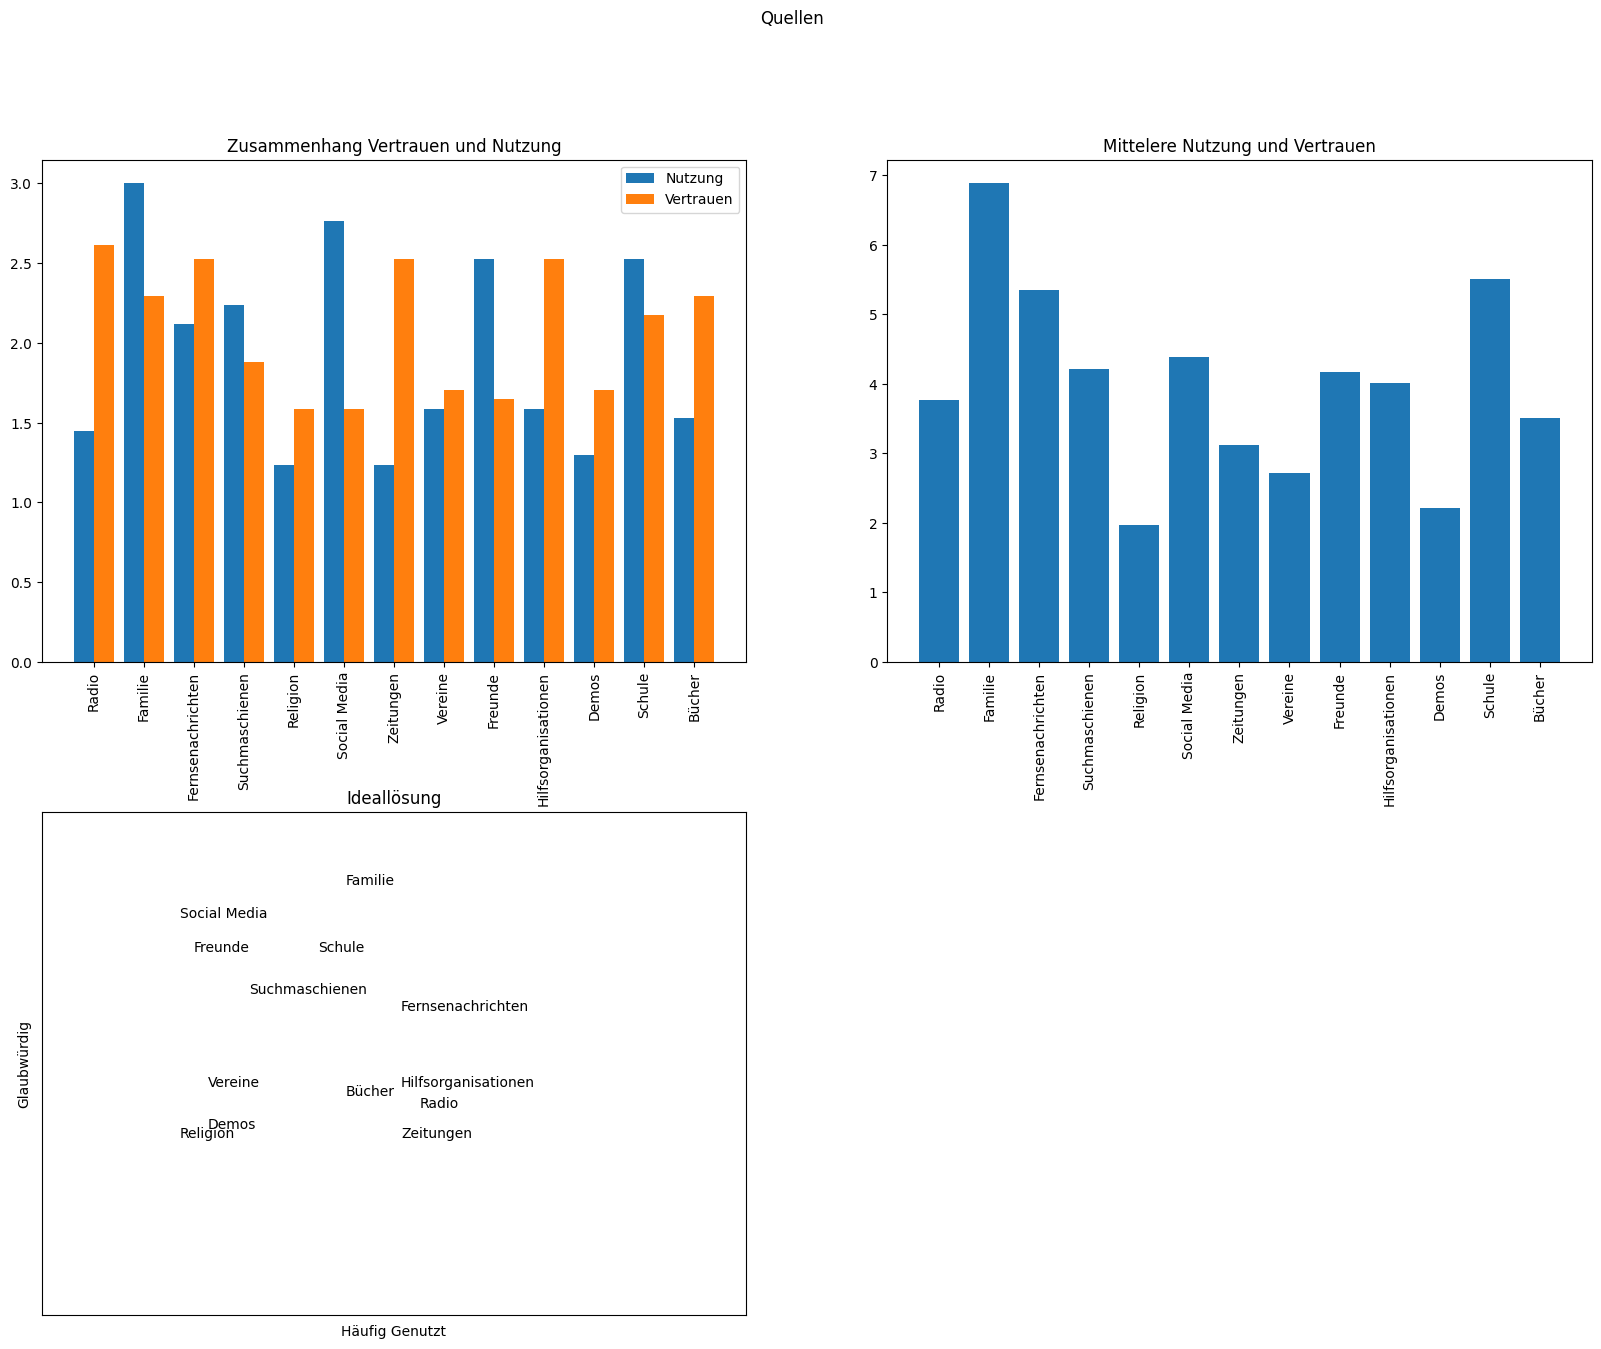

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=[20,15])

plt.subplots_adjust(hspace=0.3)

X_axis = list(range(len(nutzung)))
plt.suptitle("Quellen")
plt.subplot(2,2,1)
plt.bar([x-0.2 for x in X_axis], [nutzung[y] for y in nutzung], 0.4, label="Nutzung")
plt.bar([x+0.2 for x in X_axis], [vertrauen[y] for y in vertrauen], 0.4, label="Vertrauen")
plt.xticks(X_axis, [y for y in nutzung], rotation="vertical")
plt.title("Zusammenhang Vertrauen und Nutzung")
plt.legend()

plt.subplot(2,2,2)
complete = [nutzung[x] * vertrauen[x] for x in nutzung]
plt.xticks(X_axis, [y for y in nutzung])
plt.title("Mittelere Nutzung und Vertrauen")
plt.bar(X_axis, complete)
plt.xticks(X_axis, [y for y in nutzung], rotation="vertical")

plt.subplot(2,2,3)
plt.scatter([vertrauen[y] for y in vertrauen], [nutzung[x] for x in nutzung], marker="")

for txt in nutzung:
    plt.annotate(txt, (vertrauen[txt], nutzung[txt]))

plt.axis([1,4,0,3.5])
plt.xticks([])
plt.yticks([])
plt.xlabel("Häufig Genutzt")
plt.ylabel("Glaubwürdig")
plt.title("Ideallösung")

plt.plot()

### Auswertung
